In [1]:
import pandas as pd

In [2]:
import numpy as np
from scipy import stats, spatial

In [19]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [4]:
from trackml.dataset import load_event
hits, cells, particles, truth = load_event('data/train_100_events/event000001000')

In [7]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-64.409897,-7.163700,-1502.5,7,2,1
1,2,-55.336102,0.635342,-1502.5,7,2,1
2,3,-83.830498,-1.143010,-1502.5,7,2,1
3,4,-96.109100,-8.241030,-1502.5,7,2,1
4,5,-62.673599,-9.371200,-1502.5,7,2,1


In [8]:
cells.head()

,hit_id,ch0,ch1,value
0,1,209,617,0.013832
1,1,210,617,0.079887
2,1,209,618,0.211723
3,2,68,446,0.334087
4,3,58,954,0.034005


In [9]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits
0,4503668346847232,-0.009288,0.009861,-0.077879,-0.055269,0.323272,-0.203492,-1,8
1,4503737066323968,-0.009288,0.009861,-0.077879,-0.948125,0.470892,2.010060,1,11
2,4503805785800704,-0.009288,0.009861,-0.077879,-0.886484,0.105749,0.683881,-1,0
3,4503874505277440,-0.009288,0.009861,-0.077879,0.257539,-0.676718,0.991616,1,12
4,4503943224754176,-0.009288,0.009861,-0.077879,16.439400,-15.548900,-39.824902,1,3


In [10]:
truth.head()

,hit_id,particle_id,tx,ty,tz,tpx,tpy,tpz,weight
0,1,0,-64.411598,-7.164120,-1502.5,250710.000000,-149908.000000,-956385.00000,0.000000
1,2,22525763437723648,-55.338501,0.630805,-1502.5,-0.570605,0.028390,-15.49220,0.000010
2,3,0,-83.828003,-1.145580,-1502.5,626295.000000,-169767.000000,-760877.00000,0.000000
3,4,297237712845406208,-96.122902,-8.230360,-1502.5,-0.225235,-0.050968,-3.70232,0.000008
4,5,418835796137607168,-62.659401,-9.375040,-1502.5,-0.281806,-0.023487,-6.57318,0.000009


# Hits per module:

In [102]:
grouped_hits = hits.groupby(['volume_id', 'layer_id', 'module_id']).apply(len)

(array([  1.64140000e+04,   5.27000000e+02,   2.45000000e+02,
          2.04000000e+02,   4.80000000e+01,   1.00000000e+00,
          0.00000000e+00,   1.10000000e+01,   1.30000000e+01,
          8.00000000e+00]),
 array([   1.,   17.,   33.,   49.,   65.,   81.,   97.,  113.,  129.,
         145.,  161.]),
 <a list of 10 Patch objects>)

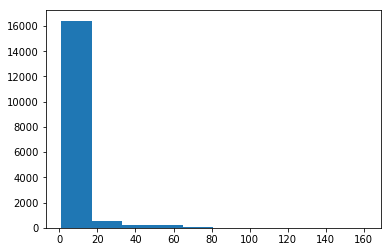

In [103]:
plt.hist(grouped_hits)

# Detector position and orientation

(array([ 108.,  108.,  108.,   20.,   88.,  108.,    0.,  108.,    0.,  108.]),
 array([  601.13413119,   691.87177399,   782.60941679,   873.34705959,
          964.08470239,  1054.82234519,  1145.55998799,  1236.2976308 ,
         1327.0352736 ,  1417.7729164 ,  1508.5105592 ]),
 <a list of 10 Patch objects>)

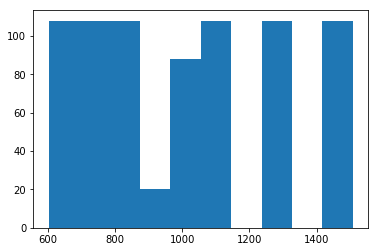

In [89]:
dists = np.sqrt(np.sum(np.square(detectors[['cx', 'cy', 'cz']]), 1))
plt.hist(dists[detectors.volume_id == 7])

In [101]:
areas = np.multiply(detectors['module_maxhu'] + detectors['module_minhu'], detectors['module_hv']*2)

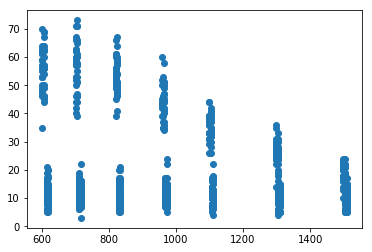

In [106]:
plt.scatter(dists[detectors.volume_id == 7], grouped_hits.loc[7].values)

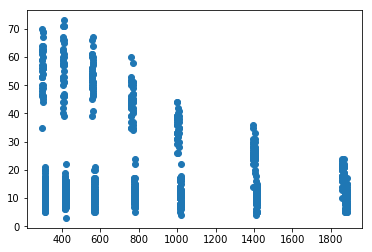

In [110]:
plt.scatter(dists[detectors.volume_id == 7]**2/areas[detectors.volume_id == 7], grouped_hits.loc[7].values)

# Volumes

In [11]:
hits.groupby("volume_id").apply(len)

volume_id
7     16873
8     29172
9     17186
12     7931
13    25990
14     7585
16     2915
17    10356
18     2931
dtype: int64

(array([ 46045.,  17186.,      0.,      0.,   7931.,  25990.,   7585.,
             0.,   2915.,  13287.]),
 array([  7. ,   8.1,   9.2,  10.3,  11.4,  12.5,  13.6,  14.7,  15.8,
         16.9,  18. ]),
 <a list of 10 Patch objects>)

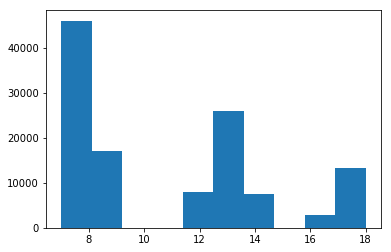

In [12]:
plt.hist(hits.volume_id)

In [13]:
detectors = pd.read_csv('data/detectors.csv')
detectors.head()

,volume_id,layer_id,module_id,cx,cy,cz,rot_xu,rot_xv,rot_xw,rot_yu,...,rot_yw,rot_zu,rot_zv,rot_zw,module_t,module_minhu,module_maxhu,module_hv,pitch_u,pitch_v
0,7,2,1,-65.7965,-5.17830,-1502.5,0.078459,-0.996917,0.0,-0.996917,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
1,7,2,2,-139.8510,-6.46568,-1502.0,0.046183,-0.998933,0.0,-0.998933,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
2,7,2,3,-138.6570,-19.34190,-1498.0,0.138156,-0.990410,0.0,-0.990410,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
3,7,2,4,-64.1764,-15.40740,-1498.0,0.233445,-0.972370,0.0,-0.972370,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625
4,7,2,5,-136.2810,-32.05310,-1502.0,0.228951,-0.973438,0.0,-0.973438,...,0.0,0,0,-1,0.15,8.4,8.4,36,0.05,0.05625


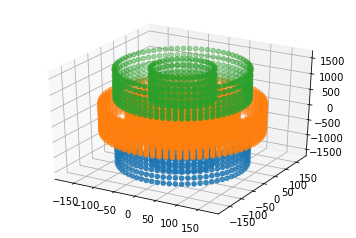

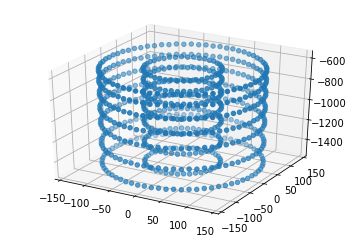

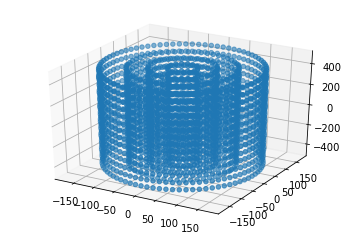

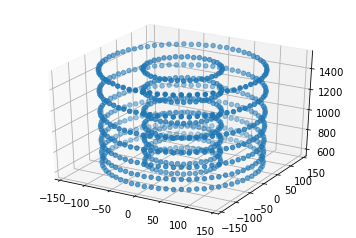

In [27]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for volume_id in [7,8,9]:
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)
    
for volume_id in [7,8,9]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)

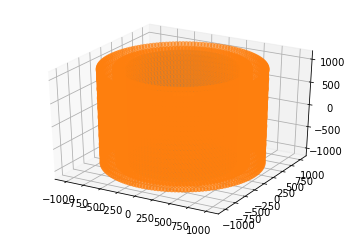

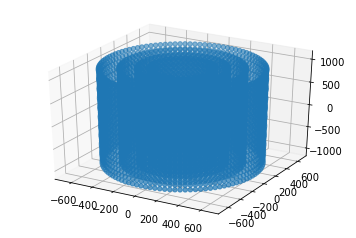

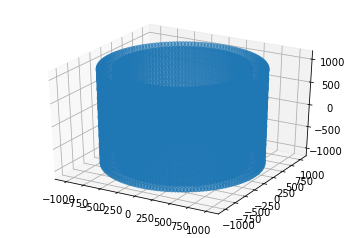

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for volume_id in [13,17]:
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)
    
for volume_id in [13,17]:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)

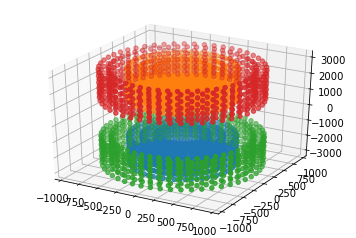

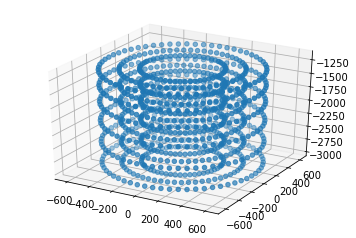

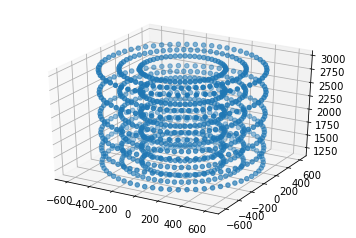

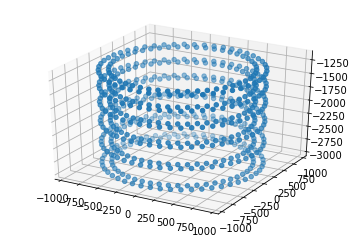

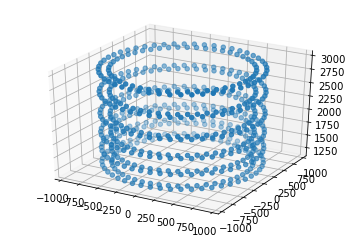

In [26]:
other_vols = np.setdiff1d(np.unique(detectors.volume_id), [7,8,9,13,17])
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for volume_id in other_vols:
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)
    
for volume_id in other_vols:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    volume = detectors[detectors.volume_id == volume_id]
    ax.scatter3D(volume.cx, volume.cy, volume.cz)

# Total Momentum

In [23]:
p = np.sqrt(particles.px**2 + particles.py**2 + particles.pz**2)
p.head()

0     0.385964
1     2.271788
2     1.124602
3     1.227834
4    45.804420
dtype: float32

(array([  1.22350000e+04,   2.10000000e+01,   5.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00735813e-01,   4.62667456e+01,   9.24327554e+01,
          1.38598765e+02,   1.84764775e+02,   2.30930785e+02,
          2.77096795e+02,   3.23262804e+02,   3.69428814e+02,
          4.15594824e+02,   4.61760834e+02]),
 <a list of 10 Patch objects>)

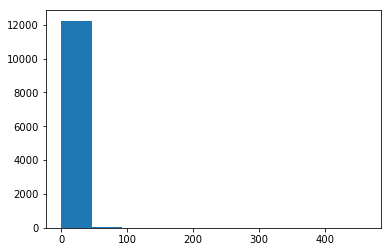

In [48]:
plt.hist(p)

In [56]:
stats.kstest(p/np.mean(p), 'expon')

KstestResult(statistic=0.21335876077610244, pvalue=0.0)

In [65]:
skewness = np.mean(((p - np.mean(p))/np.sqrt(np.var(p)))**3)
skewness

24.928986

In [66]:
kurtosis = np.mean(((p - np.mean(p))/np.sqrt(np.var(p)))**4)
kurtosis

1379.9625

## Truncate p for outliers?

In [89]:
p_trunc = p[p < 20]

(array([ 8048.,  1715.,   849.,   476.,   309.,   220.,   159.,    97.,
           75.,    61.]),
 array([  0.10073581,   2.08307213,   4.06540844,   6.04774476,
          8.03008108,  10.01241739,  11.99475371,  13.97709002,
         15.95942634,  17.94176265,  19.92409897]),
 <a list of 10 Patch objects>)

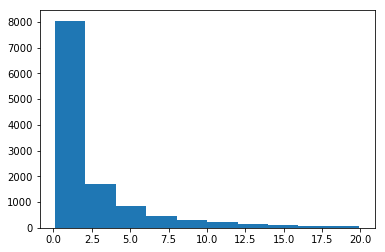

In [90]:
plt.hist(p_trunc)

In [91]:
stats.kstest(p_trunc/np.mean(p_trunc), 'expon')

KstestResult(statistic=0.17230637413513072, pvalue=4.1059519995192808e-310)

In [92]:
skewness = np.mean(((p_trunc - np.mean(p_trunc))/np.sqrt(np.var(p_trunc)))**3)
skewness

2.3758082

In [93]:
kurtosis = np.mean(((p_trunc - np.mean(p_trunc))/np.sqrt(np.var(p_trunc)))**4)
kurtosis

9.0059881

# KS test rejects exponential, but it has low power. Truncated data has approx exponential skews and kurtosis. Need to do tests